In [1]:
import pandas as pd
import numpy as np
import os 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import matplotlib.cm as cm
import seaborn as sns
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
import scipy.stats as ss
from sklearn.metrics import mean_squared_log_error
from scipy.stats import gaussian_kde

In [2]:
def plotSingle(tbl, label1, label2, sr, pr, rmsle, bias):
    plt.clf()
    fig, ax = plt.subplots()
        
    # Get x and y data 
    x = np.log10(tbl[label1])
    y = np.log10(tbl[label2])

    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    
    ## actual plotting 
    f = ax.scatter(x, y, c=z, s=5)
    plt.plot(np.arange(-2, 6), np.arange(-2, 6), c='black', linestyle = '--')
    plt.colorbar(f)
    
    ## renaming axes
    x = [10.0**x for x in np.arange(-2, 6)]
    l = np.arange(-2, 6)
    ax.set_xticks(l)
    ax.set_xticklabels(x, rotation = 20)
    ax.set_yticks(l)
    ax.set_yticklabels(x)
    
    textstr = '\n'.join((
    r'$r=%.2f$' % (pr, ),
    r'$\rho=%.2f$' % (sr ),
    r'$RMSLE=%.2f$' % (rmsle, ),
    r'$Bias=%.2f$' % (bias, )))
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)

    #plt.show()
def statsF(tbl, label1, label2):
    bias = sum(tbl[label1] - tbl[label2]) / len(tbl)
    pr, pp = ss.pearsonr(tbl[label1], tbl[label2])
    sr, sp = ss.spearmanr(tbl[label1], tbl[label2])
    rmsle = np.sqrt(mean_squared_log_error(tbl[label1], tbl[label2]))
    return bias, pr, sr, rmsle
                    
def plotFull(tbl, label1, label2, sr, pr, rmsle, bias, axs, ax1, ax2):
    
    # Get x and y data 
    x = np.log10(tbl[label1])
    y = np.log10(tbl[label2])

    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    
    ## actual plotting 
    f = axs[ax1, ax2].scatter(x, y, c=z, s=5)
    plt.plot(np.arange(-2, 6), np.arange(-2, 6), c='black', linestyle = '--')
    plt.colorbar(f)
    
    
    textstr = '\n'.join((
    r'$r=%.2f$' % (pr, ),
    r'$\rho=%.2f$' % (sr ),
    r'$RMSLE=%.2f$' % (rmsle, ),
    r'$Bias=%.2f$' % (bias, )))
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    axs[ax1, ax2].text(0.05, 0.95, textstr, fontsize=10, verticalalignment='top', bbox=props)

    #plt.show()

In [4]:
## true simple
smini = pd.read_csv('../simulation_study/sampleSize/simple_mini/treeFiles/simple_mini_true.txt', sep = '\t')
ssmall = pd.read_csv('../simulation_study/sampleSize/simple_small/treeFiles/simple_small_true.txt', sep = '\t')
sreg = pd.read_csv('../simulation_study/simple/treeFiles/simple_true.txt', sep = '\t')
slarge = pd.read_csv('../simulation_study/sampleSize/simple_10k/treeFiles/simple_10k_true.txt', sep = '\t')

## true complex
cmini = pd.read_csv('../simulation_study/sampleSize/complex_mini/treeFiles/complex_mini_true.txt', sep = '\t')
csmall = pd.read_csv('../simulation_study/sampleSize/complex_small/treeFiles/complex_small_true.txt', sep = '\t')
creg = pd.read_csv('../simulation_study/complex/treeFiles/complex_true.txt', sep = '\t')
clarge = pd.read_csv('../simulation_study/sampleSize/complex_10k/treeFiles/complex_10k_true.txt', sep = '\t')

In [5]:
true = [[smini, ssmall, slarge], [cmini, csmall, clarge]]  #sreg,creg, 

simple mini


<Figure size 640x480 with 0 Axes>

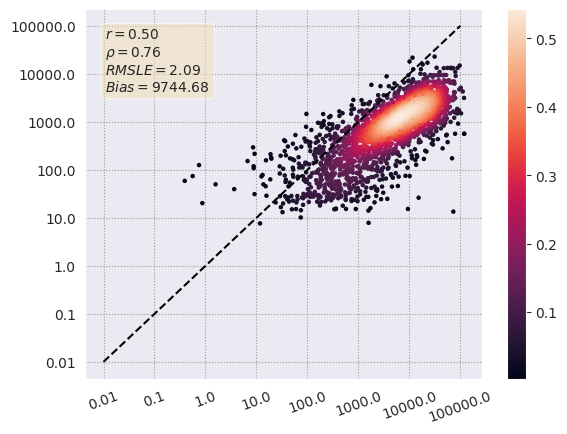

simple small


<Figure size 640x480 with 0 Axes>

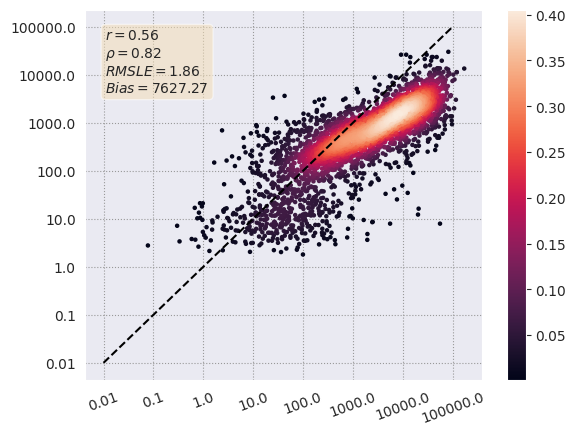

simple 10k


<Figure size 640x480 with 0 Axes>

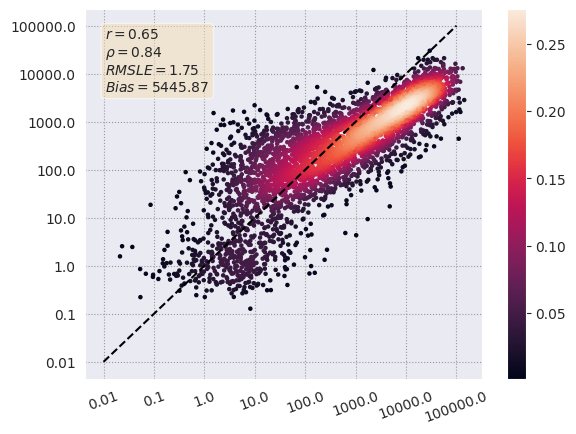

complex mini


<Figure size 640x480 with 0 Axes>

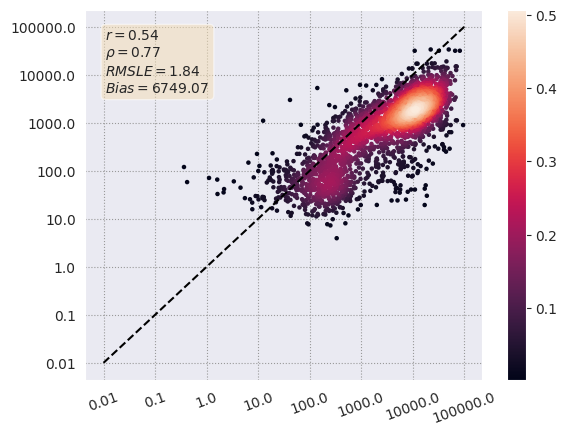

complex small


<Figure size 640x480 with 0 Axes>

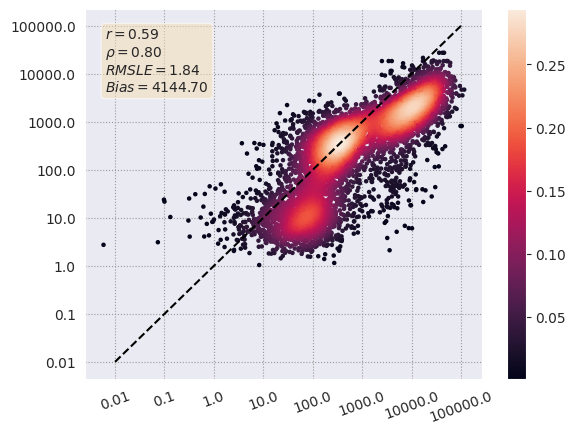

complex 10k


<Figure size 640x480 with 0 Axes>

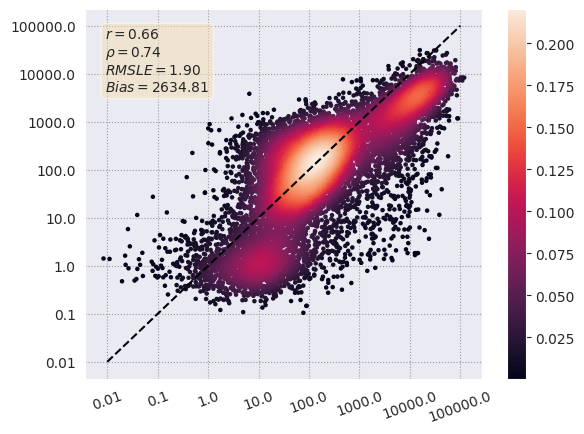

<Figure size 640x480 with 0 Axes>

In [7]:
pltVals = {}
for i, model in enumerate(['simple', 'complex']):
    models = true[i]
    vals = []
    for j, SS in enumerate(['mini', 'small', '10k']): #'reg',
        try:
            trueModel = models[j]
            rel = pd.read_csv('../results/sampleSize/{}_{}/chr22_wes_{}_{}.mut'.format(model,SS, model, SS), sep = ';')
            relM = rel.merge(trueModel, left_on = 'pos_of_snp', right_on ='position').drop_duplicates()
            relM.loc[:, 'relAge'] = relM[['age_begin', 'age_end']].mean(axis=1)
            relF = relM[relM['relAge'] > 0]
            relF.reset_index(inplace = True)

            bias, pr, sr, rmsle = statsF(relF, 'mutationTime', 'relAge')
            vals.append(pr)
            print('{} {}'.format(model, SS))
            plotSingle(relF, 'mutationTime', 'relAge', sr, pr, rmsle, bias)
            plt.show()
            #plt.savefig("../figures/{}_{}.jpg".format(model, SS), dpi = 300)
        except:
            print('Missing {} {}'.format(model, SS))
    pltVals[model] = vals
plt.clf()

            

In [8]:
def regressLine(x, y):
    from statistics import mean
    import numpy as np

    def best_fit_mb(xs,ys):
        m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
            ((mean(xs)*mean(xs)) - mean(xs*xs)))
        
        b = mean(ys) - m*mean(xs)
        
        return m, b

    m, b = best_fit_mb(np.array(x), np.array(y))

    regression_line = [(m*xval)+b for xval in x]

    return regression_line, m, b


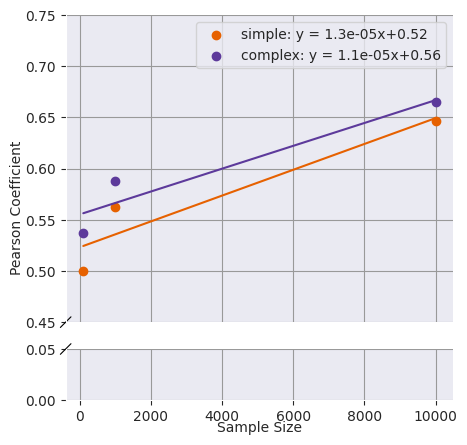

In [9]:
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes  ## https://github.com/bendichter/brokenaxes
import numpy as np

fig = plt.figure(figsize=(5, 5))
bax = brokenaxes(
    ylims=((0, 0.05), (0.45, 0.75)),
    hspace=.15,
)

sampleSizes = [100, 1000, 10000]
x = np.logspace(0.0, 4, 100)

cs = {'simple':'#E66100', 'complex':'#5D3A9B'}
for key in pltVals.keys():
    v = pltVals[key]
    r, m, b = regressLine(sampleSizes, v)
    bax.plot(sampleSizes, r, c = cs[key])
    labelVal = '{}: y = {}x+{}'.format(key, str(round(m, 6)), str(round(b, 2)))
    bax.scatter(sampleSizes, v, c = cs[key], label = labelVal)
    

bax.legend(loc='best')
bax.grid(axis='both', which='major', ls='-')
bax.grid(axis='both', which='minor', ls='--', alpha=0.4)
bax.set_ylabel('Pearson Coefficient')
bax.set_xlabel('Sample Size')
bax.legend()

plt.show()
#plt.savefig('../figures/sampleSize.jpg', dpi = 300)